# Web Scraping

In [61]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import time
import numpy as np
import csv
#the function starts counting by zero and one page has 50 matches
#if you get more than like 49 matches, the website will block you
#select a player that you want to scrape and click to 'Matches' e.g. https://www.dotabuff.com/players/87278757/matches
#copy exactly the name of the team
def dota (url, team_name, start, end, csv_filename):
    url_x = url
    #"https://www.dotabuff.com/players/87278757/matches"
    driver_x = webdriver.Chrome('./chromedriver')
    driver_x.get(url_x)
    html_x = driver_x.page_source
    soup_x = BeautifulSoup(html_x, "html.parser")
    play = []
    for match_num in range(start,end):
        print("---------")
        print(f"Match: {match_num + 1}")
        print("---------")
        click = soup_x.find_all(class_ = 'cell-large')[match_num].a['href'] 
        clickinto = "https://www.dotabuff.com" + click
        driver_x.get(clickinto)
        html_x = driver_x.page_source
        soup_x = BeautifulSoup(html_x, "html.parser") #get into each match
        #determine which section our desired team falls on. For example, our target is Team Secret
        if soup_x.select('.team-results .dire .team-text-full')[0].get_text().lower() == team_name.lower():
            #loop through 5 players
            for player in range(5):
                record = []
                record.append(match_num + 1)
                record.append(team_name)
                #determine whether the designated team wins or loses
                if team_name.lower() in soup_x.find(class_ = 'match-result').get_text().lower():
                    record.append(1) 
                else:
                    record.append(0) #0 means lose
                print(f"Player {player + 1}")
                #player name
                record.append(soup_x.select('.team-results .dire article table tbody tr')[player].find(class_ = 'tf-pl single-lines').find(class_ = 'player-text player-text-full').get_text())
                #heros
                record.append(soup_x.select('.team-results .dire article table tbody tr')[player].select('.cell-fill-image img')[0].attrs['oldtitle'])
                try:
                    #lane
                    record.append(soup_x.select('.team-results .dire article table tbody tr')[player].select('.tf-fa i')[1].attrs['oldtitle'])
                except:
                    record.append(np.nan)
                #kill
                record.append(soup_x.select('.team-results .dire article table tbody tr')[player].find(class_ = 'tf-r r-tab r-group-1 shown').get_text())
                #dead
                record.append(soup_x.select('.team-results .dire article table tbody tr')[player].find(class_ = 'tf-r r-tab r-group-1 cell-minor shown').get_text())
                #Assist
                record.append(soup_x.select('.team-results .dire article table tbody tr')[player].find_all(class_ = 'tf-r r-tab r-group-1 shown')[1].get_text())
                #Net
                record.append(soup_x.select('.team-results .dire article table tbody tr')[player].find(class_ = 'tf-r r-tab r-group-1 color-stat-gold shown').get_text().rstrip('k'))
                #LH
                record.append(soup_x.select('.team-results .dire article table tbody tr')[player].find(class_ = 'tf-r r-tab r-group-2 cell-minor').get_text())
                #GPM
                record.append(soup_x.select('.team-results .dire article table tbody tr')[player].find_all(class_ = 'tf-r r-tab r-group-2 cell-minor')[1].get_text())
                #XPM
                record.append(soup_x.select('.team-results .dire article table tbody tr')[player].find_all(class_ = 'tf-pl r-tab r-group-2 cell-minor')[1].get_text())
                #DMG
                record.append(soup_x.select('.team-results .dire article table tbody tr')[player].find(class_ = 'tf-r r-tab r-group-3 cell-minor').get_text().rstrip('k'))
                #items
                items = soup_x.select('.team-results .dire article table tbody tr')[player].find_all(class_ = 'image-container image-container-item image-container-plusicon image-container-overlay')
                #loop through each items's name and purchase time (max. 6 items)
                for i in range(len(items)):
                    record.append(items[i].img['oldtitle'])
                    record.append(items[i].get_text().rstrip('m'))
                play.append(record)
        else:
            #loop through 5 players
            for player in range(5):
                record = []
                record.append(match_num + 1)
                record.append(team_name)
                #determine whether the designated team wins or loses
                if team_name.lower() in soup_x.find(class_ = 'match-result').get_text().lower():
                    record.append(1) #0 means lose
                else:
                    record.append(0)
                print(f"Player {player + 1}")
                #player name
                record.append(soup_x.select('.team-results .radiant article table tbody tr')[player].find(class_ = 'tf-pl single-lines').find(class_ = 'player-text player-text-full').get_text())
                #heros
                record.append(soup_x.select('.team-results .radiant article table tbody tr')[player].select('.cell-fill-image img')[0].attrs['oldtitle'])
                try:
                    #lane
                    record.append(soup_x.select('.team-results .radiant article table tbody tr')[player].select('.tf-fa i')[1].attrs['oldtitle'])
                except:
                    record.append(np.nan)
                #kill
                record.append(soup_x.select('.team-results .radiant article table tbody tr')[player].find(class_ = 'tf-r r-tab r-group-1 shown').get_text())
                #dead
                record.append(soup_x.select('.team-results .radiant article table tbody tr')[player].find(class_ = 'tf-r r-tab r-group-1 cell-minor shown').get_text())
                #Assist
                record.append(soup_x.select('.team-results .radiant article table tbody tr')[player].find_all(class_ = 'tf-r r-tab r-group-1 shown')[1].get_text())
                #Net
                record.append(soup_x.select('.team-results .radiant article table tbody tr')[player].find(class_ = 'tf-r r-tab r-group-1 color-stat-gold shown').get_text().rstrip('k'))
                #LH
                record.append(soup_x.select('.team-results .radiant article table tbody tr')[player].find(class_ = 'tf-r r-tab r-group-2 cell-minor').get_text())
                #GPM
                record.append(soup_x.select('.team-results .radiant article table tbody tr')[player].find_all(class_ = 'tf-r r-tab r-group-2 cell-minor')[1].get_text())
                #XPM
                record.append(soup_x.select('.team-results .radiant article table tbody tr')[player].find_all(class_ = 'tf-pl r-tab r-group-2 cell-minor')[1].get_text())
                #DMG
                record.append(soup_x.select('.team-results .radiant article table tbody tr')[player].find(class_ = 'tf-r r-tab r-group-3 cell-minor').get_text().rstrip('k'))
                #items
                items = soup_x.select('.team-results .radiant article table tbody tr')[player].find_all(class_ = 'image-container image-container-item image-container-plusicon image-container-overlay')
                #loop through each items's name and purchase time (max. 6 items)
                for i in range(len(items)):
                    record.append(items[i].img['oldtitle'])
                    record.append(items[i].get_text().rstrip('m'))
                play.append(record)
        #return to the home page
        driver_x.get(url_x)
        html_x = driver_x.page_source
        soup_x = BeautifulSoup(html_x, "html.parser")
    driver_x.close()
    #write to a csv file to the current folder
    with open (csv_filename +".csv", "w") as result:
        writer = csv.writer(result)
        writer.writerow(['Match', 'Team_Name', 'Match_Result','Player_Name', 'Hero_Name', 'Lane', 'Kill', 'Death', 'Assist', 'Net Worth', 'Last_Hit', 'GPM','XPM','DMG','Item1', 'Time1', 'Item2', 'Time2', 'Item3', 'Time3', 'Item4', 'Time4', 'Item5', 'Time5','Item6','Time6'])
        writer.writerows(play)
    if end - start <= 1: 
        print('-------------------')
        print(f"Total: {end - start} match")
        print('-------------------')
    else:
        print('-------------------')
        print(f"Total: {end - start} matches")
        print('-------------------')
    return play #the output will be a list of lists which show each player in each match

In [62]:
team_secret_test = dota("https://www.dotabuff.com/players/87278757/matches", "Team Secret", 0, 1, "new_format")

---------
Match: 1
---------
Player 1
Player 2
Player 3
Player 4
Player 5
-------------------
Total: 1 match
-------------------


# Data Cleaning & Visualisation

In [63]:
import pandas as pd
import re
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
sns.set(color_codes=True)
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 300
pd.options.display.max_rows = 1000

In [64]:
dota_3_teams = pd.read_csv('./Project 1/three_teams_50_matches.csv')
dota_3_teams.dtypes

Match             int64
Team_Name        object
Match_Result      int64
Player_Name      object
Hero_Name        object
Lane             object
Kill             object
Death             int64
Assist           object
Net Worth       float64
Last_Hit         object
GPM              object
XPM               int64
DMG             float64
Item1            object
Time1           float64
Item2            object
Time2           float64
Item3            object
Time3           float64
Item4            object
Time4           float64
Item5            object
Time5           float64
Item6            object
Time6           float64
dtype: object

In [65]:
dota_3_teams['Match'] = dota_3_teams['Match'].astype('category')
dota_3_teams['Match_Result'] = dota_3_teams['Match_Result'].apply(lambda result: 'Win' if result == 1 else 'Lose').astype('category')
dota_3_teams.Player_Name.unique()
#remove the coach in Evil Geniuses
dota_3_teams = dota_3_teams.drop(dota_3_teams[dota_3_teams['Player_Name'] == 'EG.BuLba'].index) 
dota_3_teams['Kill'] = dota_3_teams['Kill'].str.replace('-','0').astype('int64')
dota_3_teams['Assist'] = dota_3_teams['Assist'].str.replace('-','0').astype('int64')
dota_3_teams['Last_Hit'] = dota_3_teams['Last_Hit'].str.replace('k','00').str.replace('.','').astype('int64')
dota_3_teams['GPM'] = dota_3_teams['GPM'].str.replace('k','00').str.replace('.','').astype('int64')

In [66]:
dota_3_teams.dtypes

Match           category
Team_Name         object
Match_Result    category
Player_Name       object
Hero_Name         object
Lane              object
Kill               int64
Death              int64
Assist             int64
Net Worth        float64
Last_Hit           int64
GPM                int64
XPM                int64
DMG              float64
Item1             object
Time1            float64
Item2             object
Time2            float64
Item3             object
Time3            float64
Item4             object
Time4            float64
Item5             object
Time5            float64
Item6             object
Time6            float64
dtype: object

#### Create New column, KDA_Ratio, by using Kill, Death and Assist

In [67]:
dota_3_teams['KDA_Ratio'] = ((dota_3_teams['Kill'] + dota_3_teams['Assist']) / (dota_3_teams['Death'] + 1)).round(2)
mean_3_teams = dota_3_teams.groupby(['Team_Name','Player_Name'])[['Net Worth','KDA_Ratio','GPM']].mean().reset_index().sort_values(['Team_Name','Net Worth','KDA_Ratio','GPM'], ascending = False)
mean_3_teams

,Team_Name,Player_Name,Net Worth,KDA_Ratio,GPM
11,Team Secret,Secret.Nisha,23.024000,7.512000,629.90
10,Team Secret,Secret.MidOne,20.126000,6.108800,574.12
14,Team Secret,Secret.zai,14.528000,4.326000,434.28
13,Team Secret,Secret.YapzOr,12.934000,5.493600,365.84
12,Team Secret,Secret.Puppey,7.476000,3.644600,306.34
5,PSG.LGD,PSG.LGD.Ame,20.748000,6.400000,616.90
7,PSG.LGD,PSG.LGD.Maybe,20.556000,5.817200,620.86
6,PSG.LGD,PSG.LGD.Chalice,15.230000,5.326200,466.02
8,PSG.LGD,PSG.LGD.fy,10.164000,3.692600,331.78
9,PSG.LGD,PSG.LGD.xNova,5.184000,2.714600,276.14


#### Determine each player's role in each team

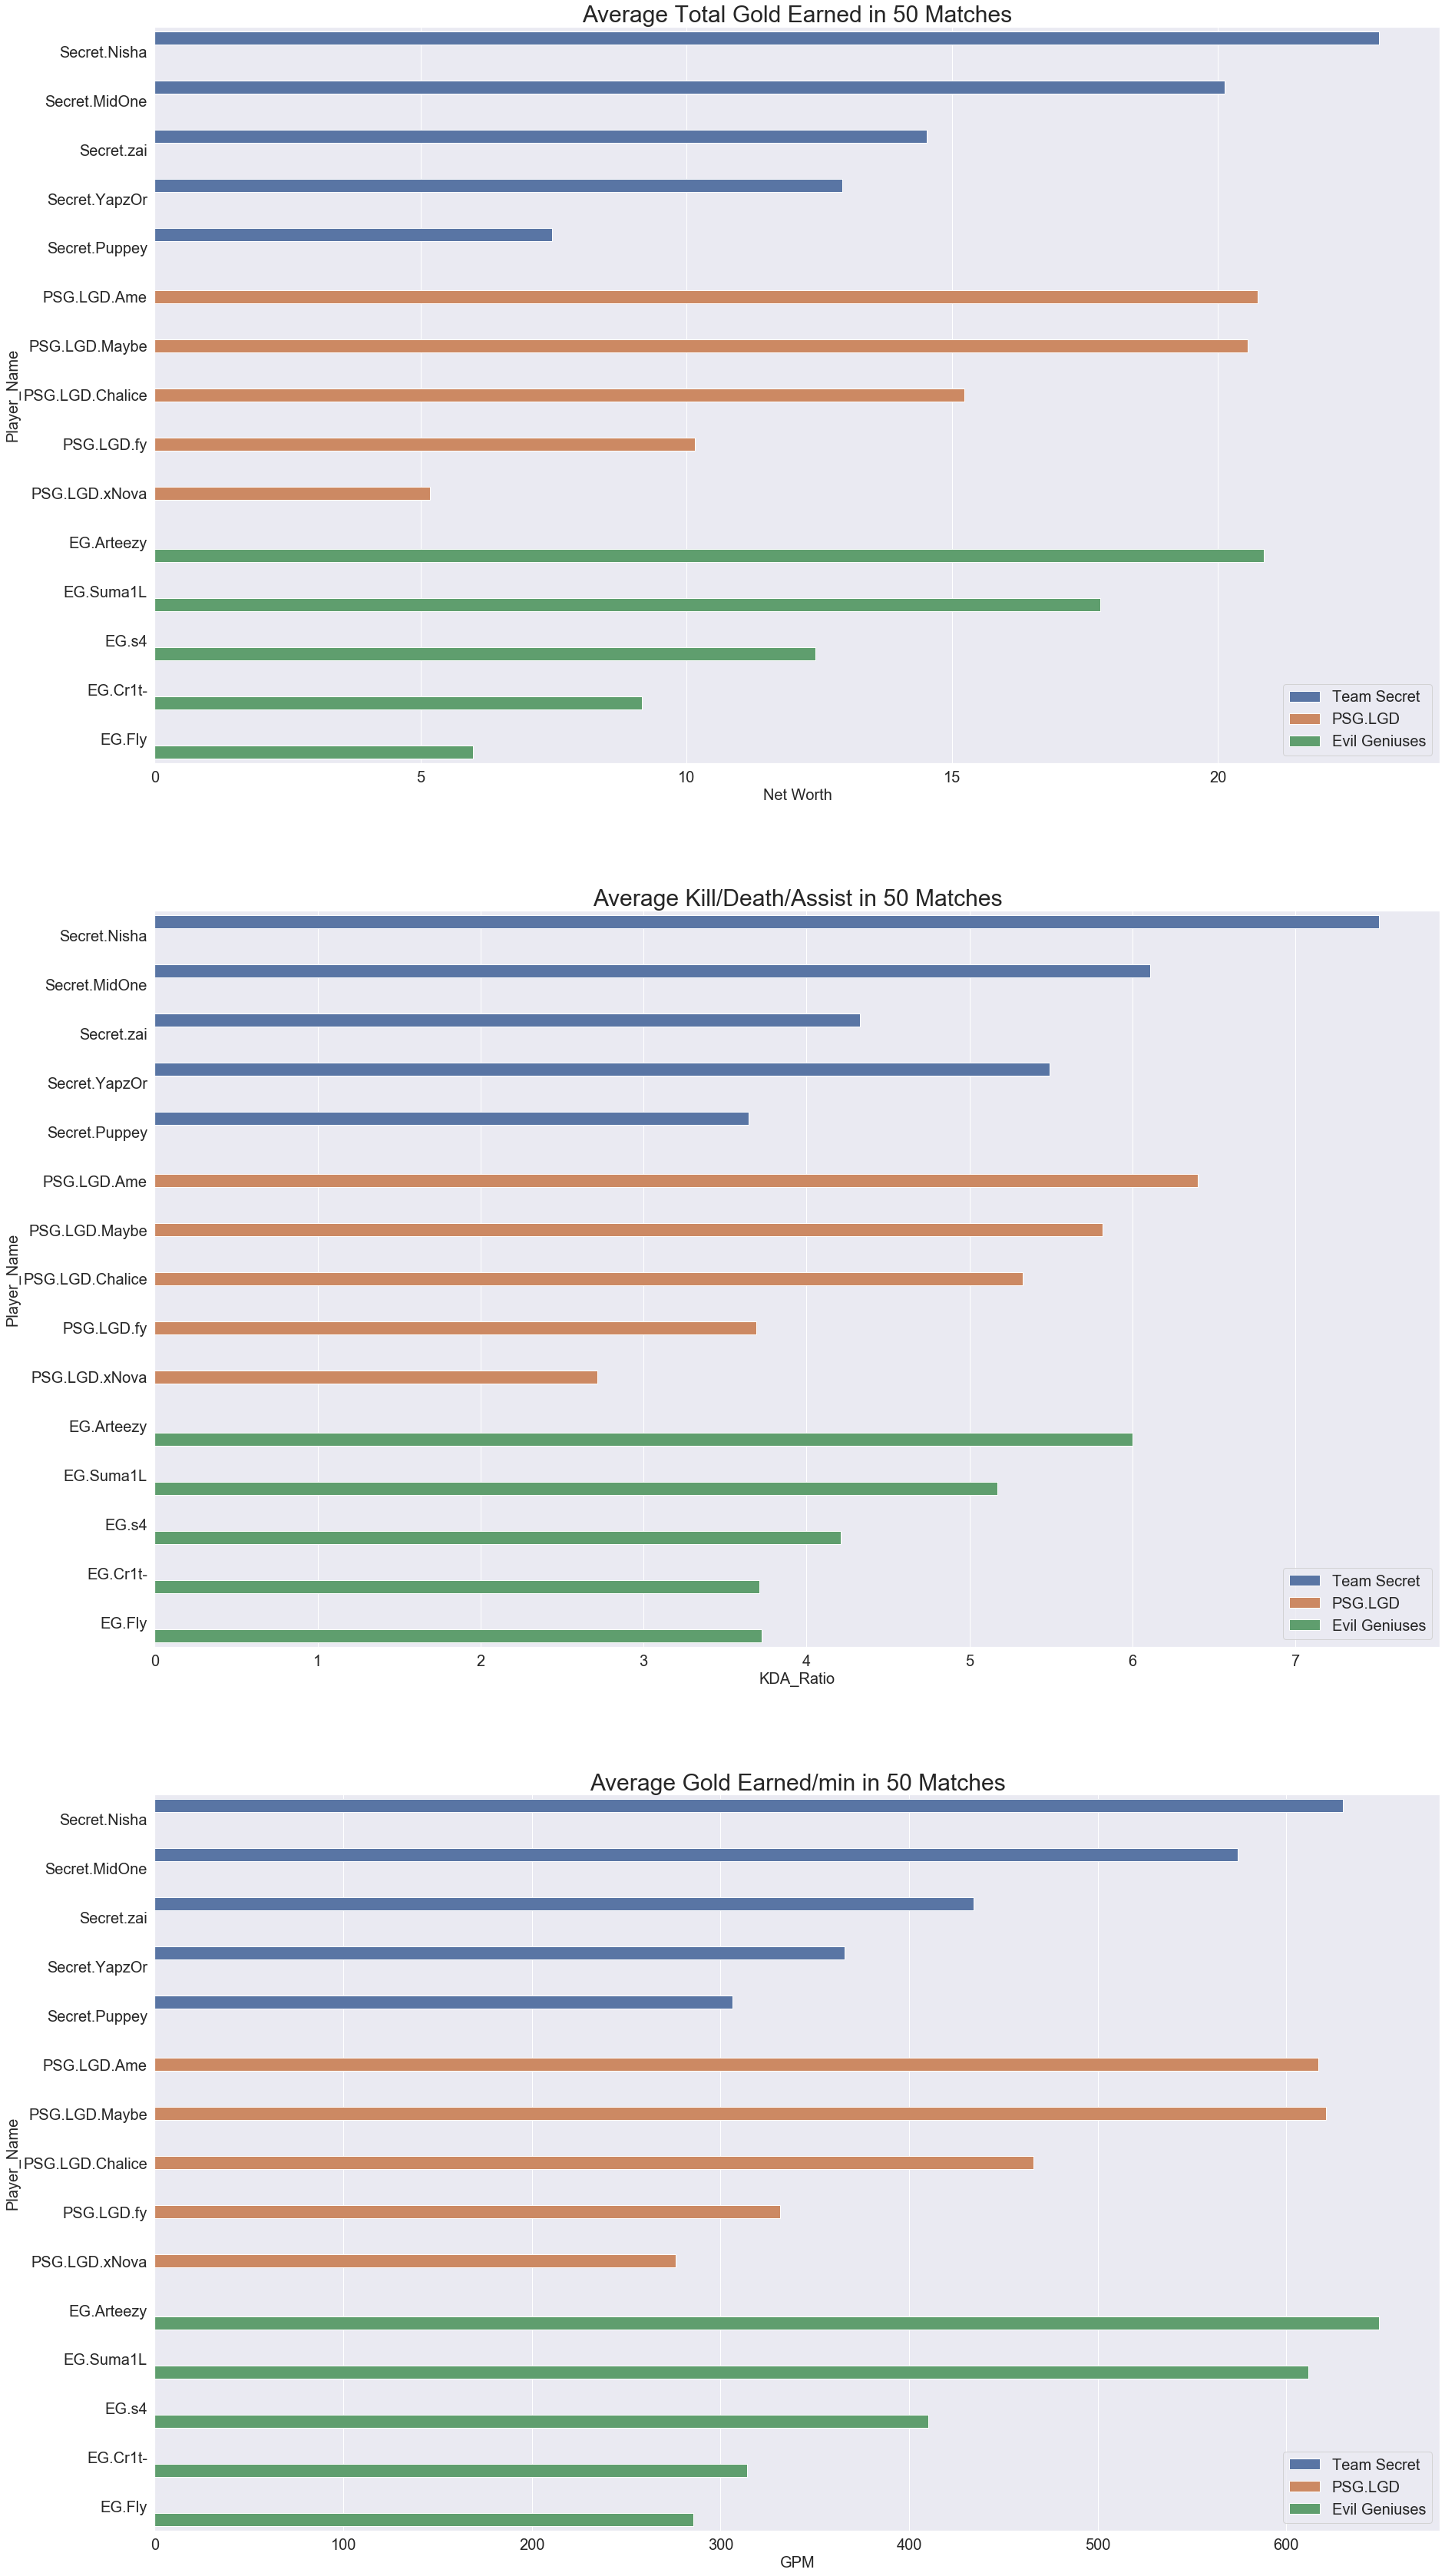

In [68]:
plt.figure(figsize = (30,60))
# plt.subplots_adjust(top = 0.95, hspace = 0.3)
plt.subplot(3,1,1)
ax1 = sns.barplot(data = mean_3_teams, x = 'Net Worth', y = 'Player_Name', hue = 'Team_Name')
ax1.set_title('Average Total Gold Earned in 50 Matches', fontsize = 30)
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax1.yaxis.label.set_size(20)
ax1.xaxis.label.set_size(20)
ax1.legend(fontsize=20)

plt.subplot(3,1,2)
ax2 = sns.barplot(data = mean_3_teams, x = 'KDA_Ratio', y = 'Player_Name' , hue = 'Team_Name')
ax2.set_title('Average Kill/Death/Assist in 50 Matches', fontsize = 30)
ax2.tick_params(axis="x", labelsize=20)
ax2.tick_params(axis="y", labelsize=20)
ax2.xaxis.label.set_size(20)
ax2.yaxis.label.set_size(20)
ax2.legend(fontsize=20)

plt.subplot(3,1,3)
ax3 = sns.barplot(data = mean_3_teams, x = 'GPM', y = 'Player_Name', hue = 'Team_Name')
ax3.set_title('Average Gold Earned/min in 50 Matches', fontsize = 30)
ax3.tick_params(axis="x", labelsize=20)
ax3.tick_params(axis="y", labelsize=20)
ax3.xaxis.label.set_size(20)
ax3.yaxis.label.set_size(20)
ax3.legend(fontsize=20)

#### Number of Matches that  each Hero wins (Role 1 and Role 2 only)

In [69]:
#role 1 and role 2_Heros used
result_Heros = dota_3_teams[(dota_3_teams.Player_Name == 'EG.Arteezy')|(dota_3_teams.Player_Name == 'Secret.Nisha')|(dota_3_teams.Player_Name == 'PSG.LGD.Ame')|(dota_3_teams.Player_Name == 'EG.Suma1L')|(dota_3_teams.Player_Name == 'Secret.MidOne')|(dota_3_teams.Player_Name == 'PSG.LGD.Maybe')][["Hero_Name","Match_Result"]]

In [70]:
result_Heros

,Hero_Name,Match_Result
2,Templar Assassin,Lose
4,Ember Spirit,Lose
7,Sven,Lose
9,Gyrocopter,Lose
12,Lifestealer,Lose
14,Ember Spirit,Lose
17,Juggernaut,Win
19,Monkey King,Win
22,Lifestealer,Lose
24,Templar Assassin,Lose


In [71]:
result_Heros1 = result_Heros.groupby('Hero_Name')['Match_Result']
result_Heros1
# print(result_Heros1)
# a = result_Heros1.xs('Lose', level =1)
# a.index
# len(result_Heros1.xs('Win', level =1)
heros = []
for name, group in result_Heros1:
#     print(group.value_counts().loc['Win'])
    temp = [name, group.value_counts().loc['Win'], group.value_counts().loc['Lose'], group.value_counts().loc['Win']+ group.value_counts().loc['Lose']]
    heros.append(temp)

result_Heros2 = pd.DataFrame(heros, columns = ['Hero_Name','Win', 'Lose', 'Total_Match'])
result_Heros2 =result_Heros2.sort_values('Win', ascending = False)
result_Heros2

,Hero_Name,Win,Lose,Total_Match
42,Sven,29,3,32
15,Leshrac,12,4,16
43,Templar Assassin,12,7,19
25,Morphling,11,2,13
41,Storm Spirit,11,6,17
9,Ember Spirit,10,7,17
24,Monkey King,9,3,12
26,Naga Siren,8,1,9
22,Medusa,7,3,10
2,Arc Warden,7,3,10


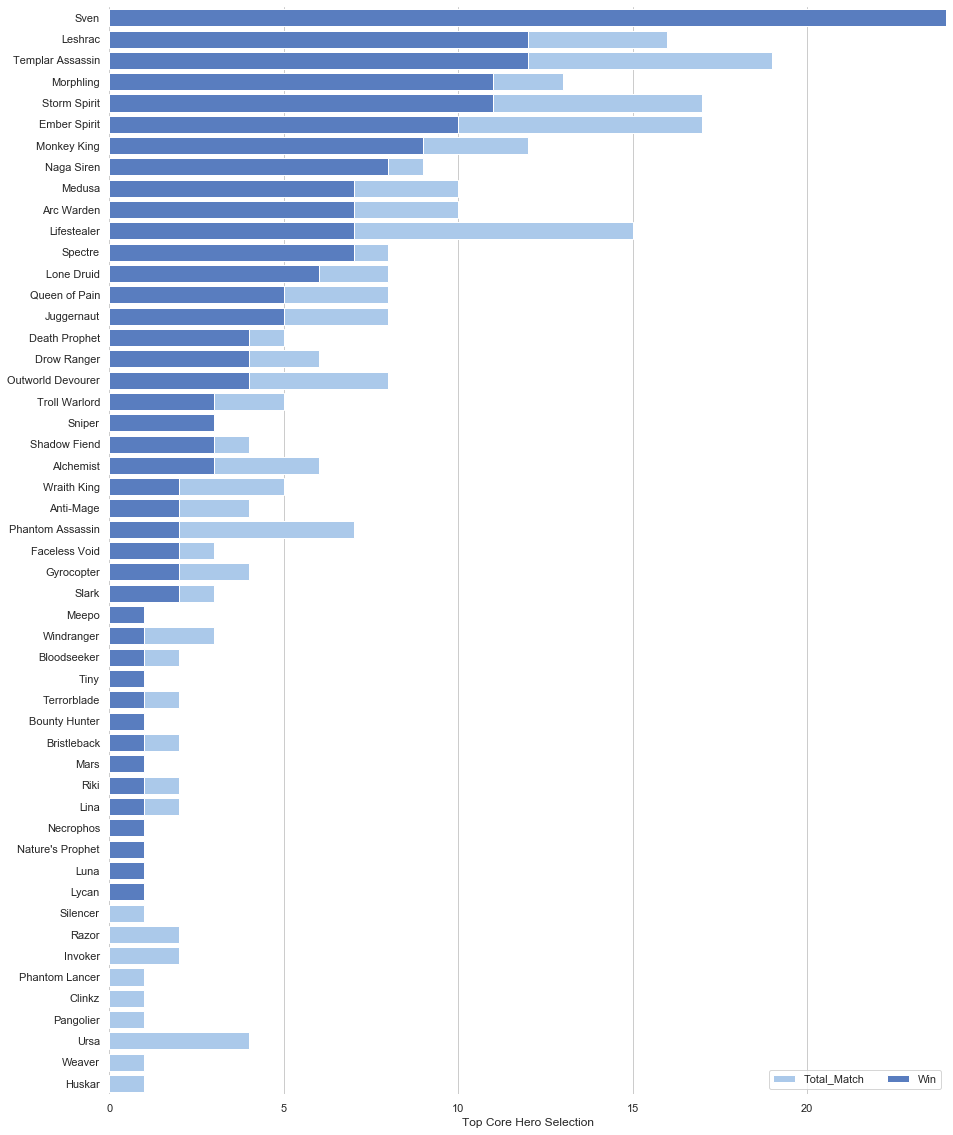

In [72]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 20))

# Plot the total match
sns.set_color_codes("pastel")
sns.barplot(x="Total_Match", y="Hero_Name", data= result_Heros2,
            label="Total_Match", color="b")
#Plot the number of win 
sns.set_color_codes("muted")
sns.barplot(x="Win", y="Hero_Name", data=result_Heros2,
            label="Win", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Top Core Hero Selection")
sns.despine(left=True, bottom=True)

#### Choose the top hero and find the item purchased

In [73]:
result_Heros2.iloc[:5]

,Hero_Name,Win,Lose,Total_Match
42,Sven,29,3,32
15,Leshrac,12,4,16
43,Templar Assassin,12,7,19
25,Morphling,11,2,13
41,Storm Spirit,11,6,17


In [74]:
#look for 'Sven' only as an example
hero1 = dota_3_teams[(dota_3_teams['Hero_Name'] == 'Sven') & (dota_3_teams['Match_Result'] == 'Win')].iloc[:,14:-1]

In [75]:
item1 = hero1["Item1"].value_counts().reset_index()
item1.columns = ['Item1', 'Time1']

item2 = hero1["Item2"].value_counts().reset_index()
item2.columns = ['Item2', 'Time2']

item3 = hero1["Item3"].value_counts().reset_index()
item3.columns = ['Item3', 'Time3']

item4 = hero1["Item4"].value_counts().reset_index()
item4.columns = ['Item4', 'Time4']

item5 = hero1["Item5"].value_counts().reset_index()
item5.columns = ['Item5', 'Time5']

item6 = hero1["Item6"].value_counts().reset_index()
item6.columns = ['Item6', 'Time6']

# print(hero1["Item2"].value_counts())
# print(hero1["Item3"].value_counts())
# Item1_Sven = hero1.groupby('Item1')['Time1'].mean().round(2).reset_index()
# Item2_Sven = hero1.groupby('Item2')['Time2'].mean().round(2).reset_index()

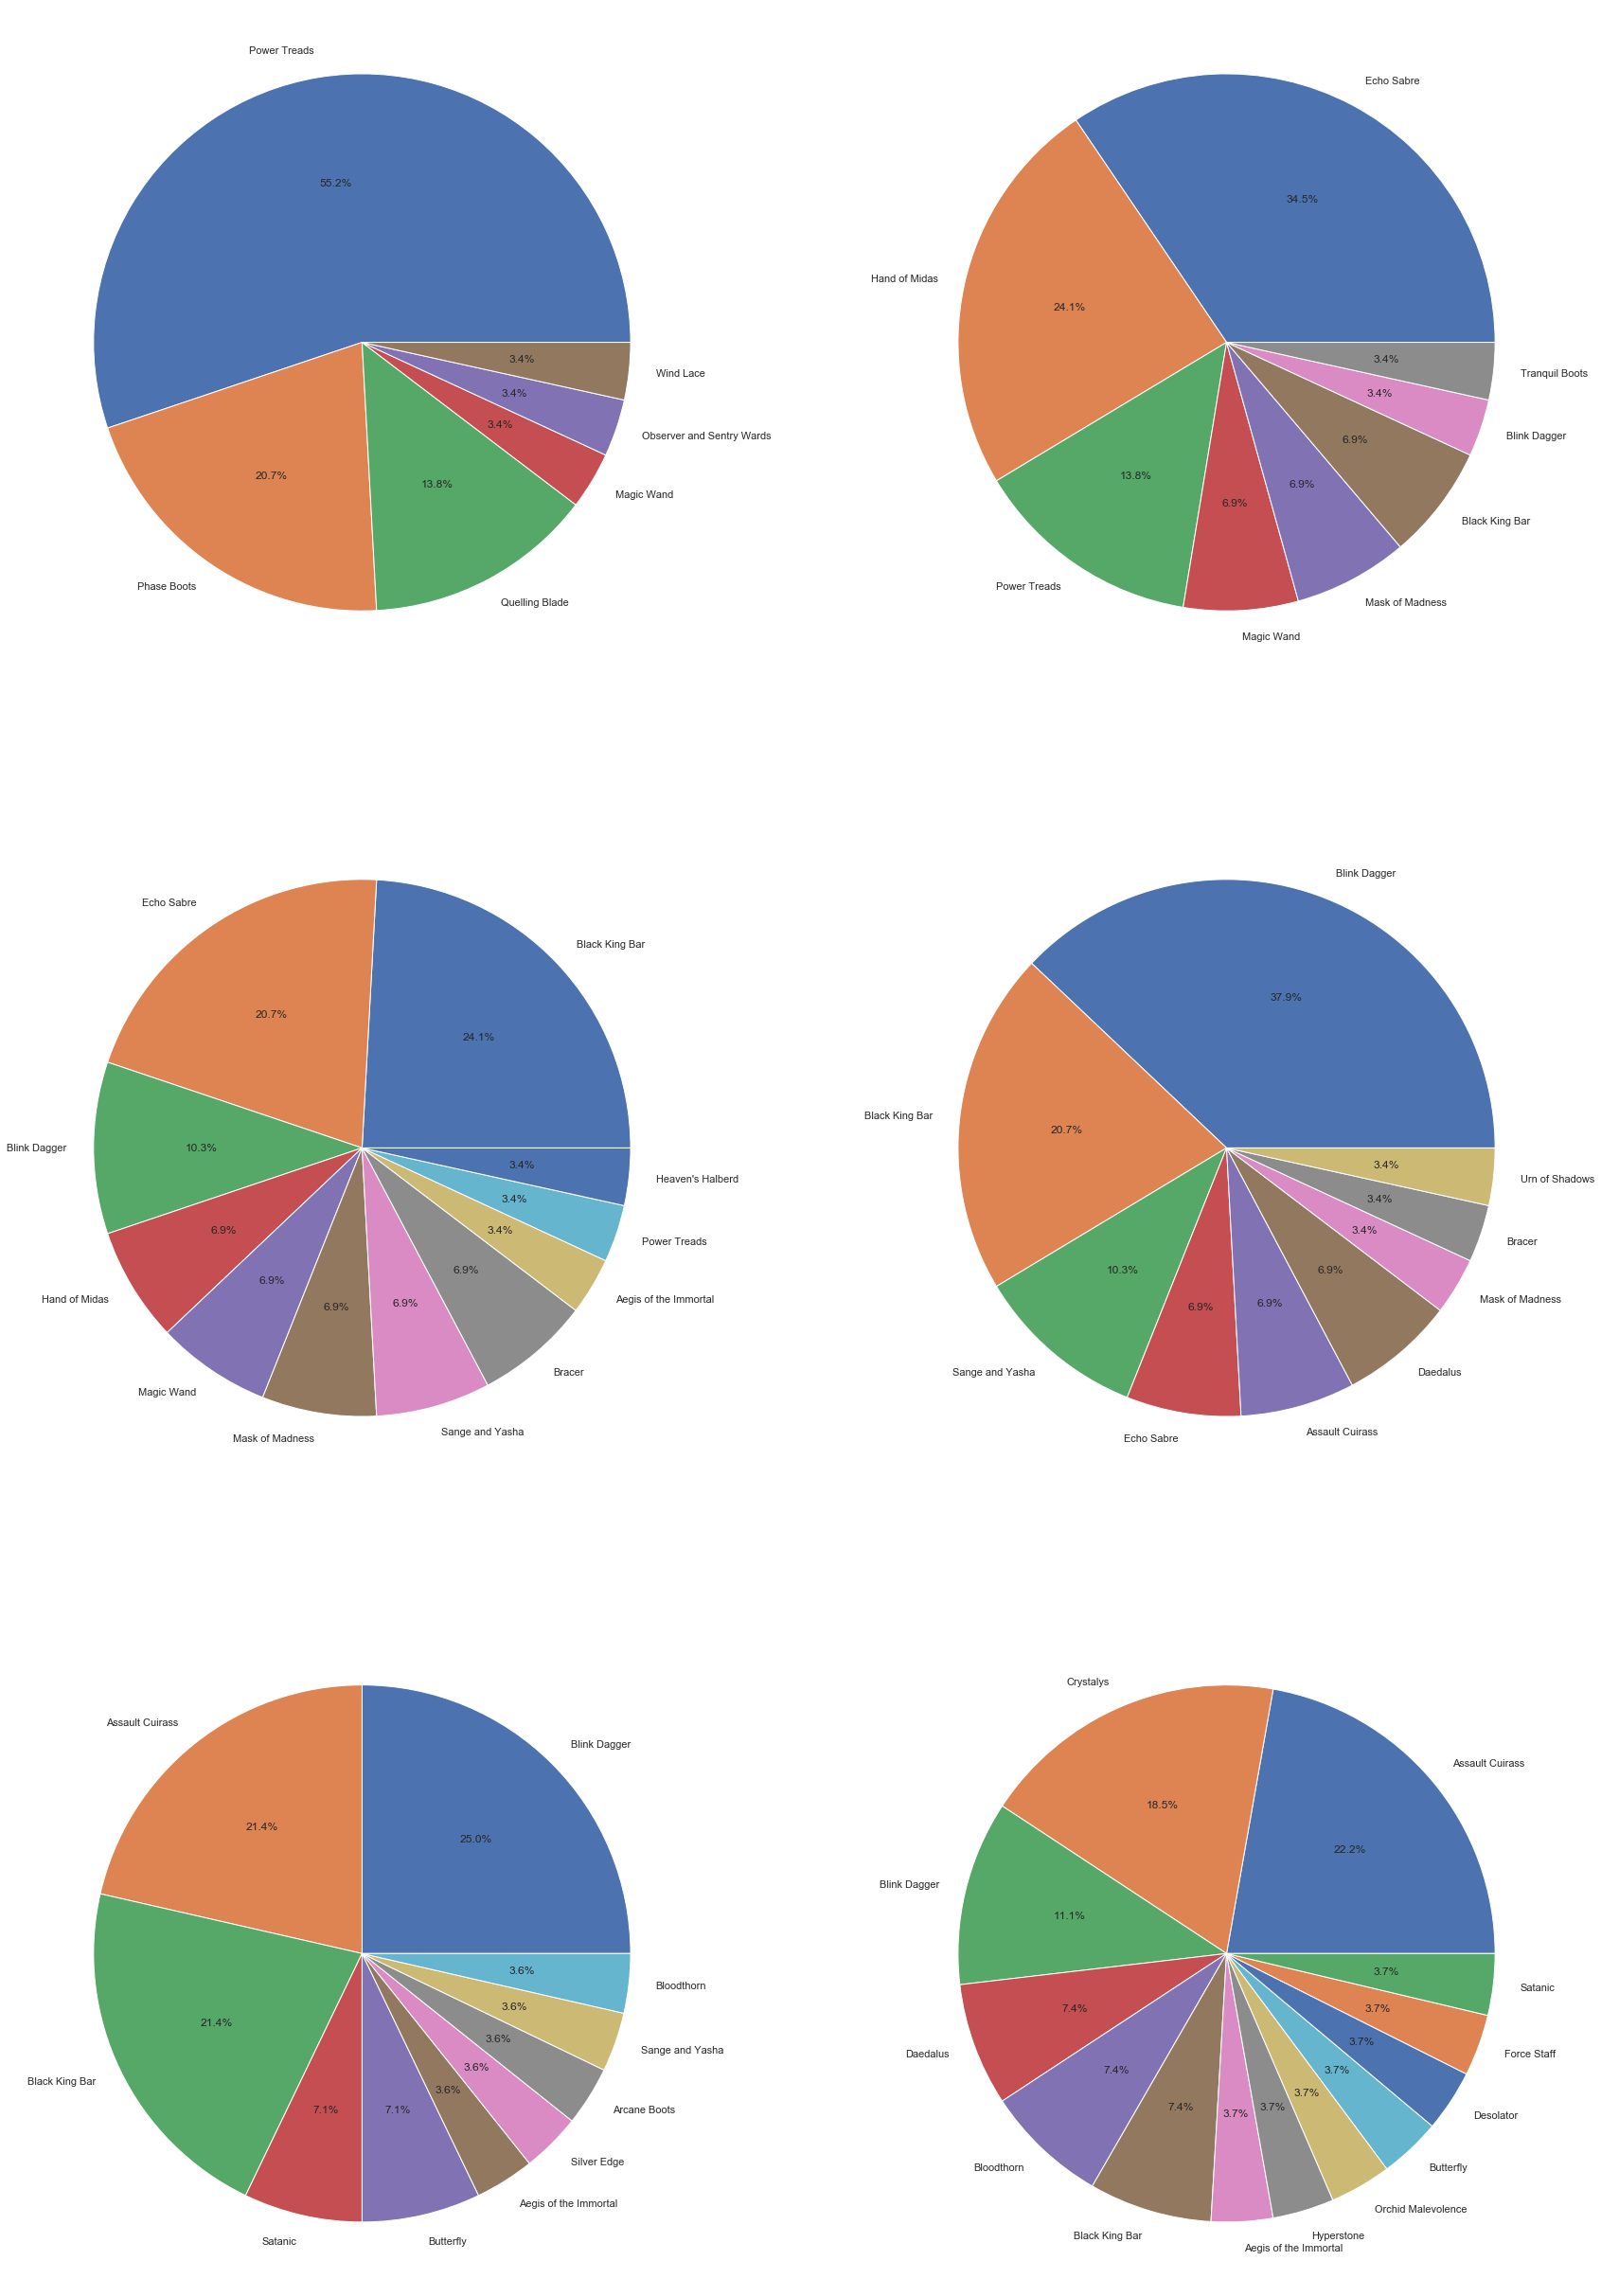

In [76]:
plt.figure(figsize = (30,60))
# plt.rc('legend',fontsize=20)
# plt.subplots_adjust(top = 0.95, hspace = 0.3)
plt.subplot(4,2,1)
ax = plt.pie(item1['Time1'], labels = item1['Item1'], autopct = '%0.1f%%')
plt.subplot(4,2,2)
ax1 = plt.pie(item2['Time2'], labels = item2['Item2'], autopct = '%0.1f%%')
plt.subplot(4,2,3)
ax2 = plt.pie(item3['Time3'], labels = item3['Item3'], autopct = '%0.1f%%')
plt.subplot(4,2,4)
ax3 = plt.pie(item4['Time4'], labels = item4['Item4'], autopct = '%0.1f%%')
plt.subplot(4,2,5)
ax4 = plt.pie(item5['Time5'], labels = item5['Item5'], autopct = '%0.1f%%')
plt.subplot(4,2,6)
ax5 = plt.pie(item6['Time6'], labels = item6['Item6'], autopct = '%0.1f%%')